In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (Qobj, sesolve, ket2dm)

In [629]:
##define all of the parameters
Phi =  np.pi
Psi = np.pi/2
Delta0 = 0
Delta1 = 0
Delta2 = 0
Delta3 = 0
Alpha10 = 1
Alpha23 = 1
Alpha30 = 1
Alpha12 = 1
AlphaRFm = 1
AlphaRFg = 0

##define the basis states
Zero = Qobj([[1], [0], [0], [0]])
One = Qobj([[0], [1], [0], [0]])
Two = Qobj([[0], [0], [1], [0]])
Three = Qobj([[0], [0], [0], [1]])
Minus = (Alpha23* One - Alpha12 * Three) / np.sqrt(Alpha12**2 + Alpha23**2)
Plus = (Alpha12* One + Alpha23 * Three) / np.sqrt(Alpha12**2 + Alpha23**2)
Minus1 = (Alpha23* Zero - Alpha12 * Two) / np.sqrt(Alpha12**2 + Alpha23**2)
Plus1 = (Alpha12* Zero + Alpha23 * Two) / np.sqrt(Alpha12**2 + Alpha23**2)
Sx32 = Qobj([[1], [np.sqrt(3)], [np.sqrt(3)], [1]] / (2*np.sqrt(2)))

##define the Hamiltonian
H = Qobj([
    [Delta0, Alpha10, 0, Alpha30*np.exp(-1j*Phi)],
    [Alpha10, Delta1, Alpha12, AlphaRFm*np.exp(1j*Psi)],
    [0, Alpha12, 0, Alpha23],
    [Alpha30*np.exp(1j * Phi), AlphaRFm*np.exp(-1j*Psi), Alpha23, Delta3]
])

In [632]:
#Simulate

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 1001)

#convert to density matrices
dmZero = ket2dm(Zero)
dmOne = ket2dm(One)
dmTwo = ket2dm(Two)
dmThree = ket2dm(Three)
dmMinus = ket2dm(Minus)
dmPlus = ket2dm(Plus)

dmStates = [dmZero,dmOne,dmTwo,dmThree,dmMinus,dmPlus]

Results = []
for i in range(np.size(dmStates)):
    Results.append(sesolve(H, One, tlist, e_ops=[dmStates[i]])) #finding the expectation value of dmStates[i]

#get an array of the probabilities of being in each state
Probs = []
for i in range(np.size(Results)):
    Probs.append(Results[i].expect[0])

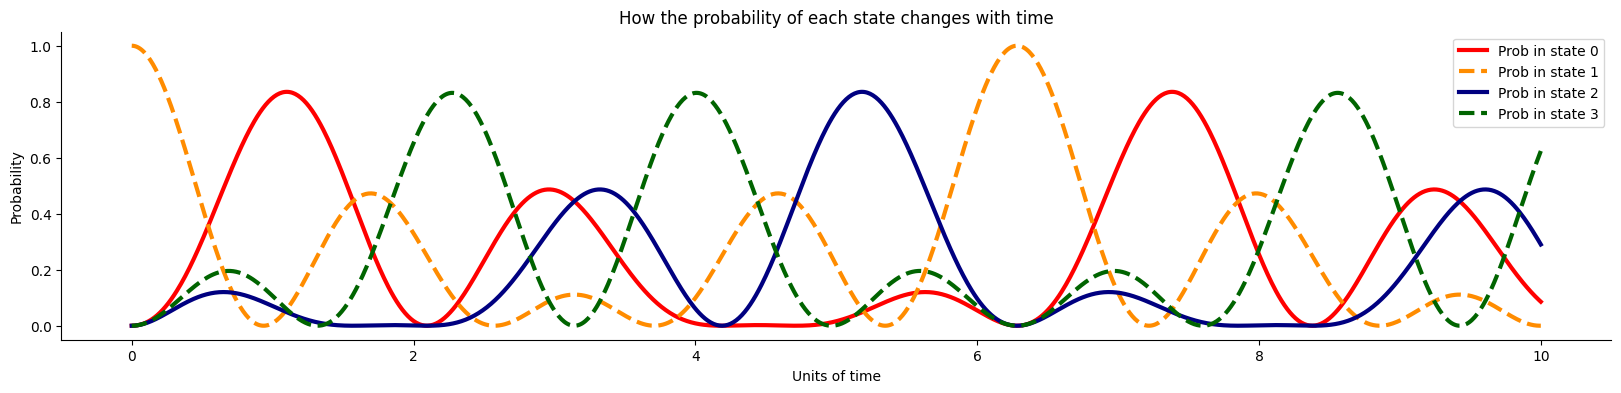

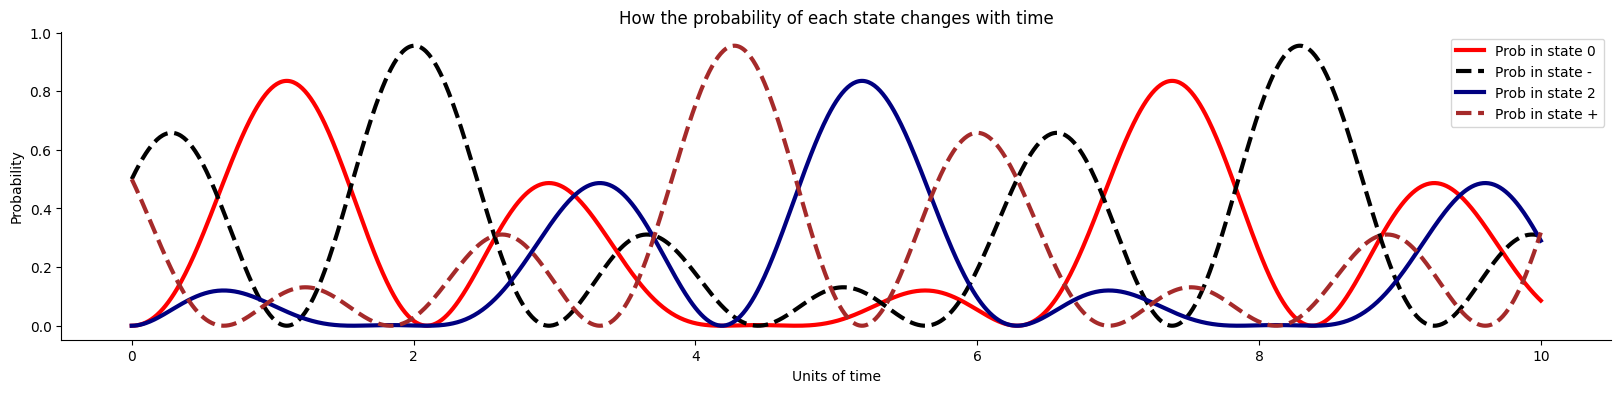

In [633]:
#define a function to plot graphs:
def Plot(Plots,Colours,Labels,Linestyles):
    plt.figure(figsize=(20,4))

    for i in range(0,np.size(Colours)):
        plt.plot(tlist,Plots[i], color=Colours[i], label = Labels[i], linestyle=Linestyles[i], linewidth = 3)
    
    # Set the plot free
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.legend(loc='upper right')
    plt.title('How the probability of each state changes with time')
    plt.ylabel('Probability')
    plt.xlabel('Units of time')
    plt.show()

Plots1 = [Probs[0],Probs[1],Probs[2],Probs[3]]
Colours1 = ['red','darkorange','navy','darkgreen']
Labels1 = ['Prob in state 0','Prob in state 1','Prob in state 2','Prob in state 3']
Linestyles1 = ['-','--','-','--']

Plots2 = [Probs[0],Probs[4],Probs[2],Probs[5]]
Colours2 = ['red','black','navy','brown']
Labels2 = ['Prob in state 0','Prob in state -','Prob in state 2','Prob in state +']
Linestyles2 = ['-','--','-','--']

Plot(Plots1,Colours1,Labels1,Linestyles1)
Plot(Plots2,Colours2,Labels2,Linestyles2)